# Convolutional Neural Networks for Image Classification

## If for some reason, the Tensorflow does not work, try doing this lab on Google Colab (https://colab.google/)


## Objectives:
- Recall the basics of Convolutional Neural Networks (CNNs)
- Learn how to build and train a simple CNN for image classification
- Evaluate the performance of the trained model on a test dataset

## Convolutional Neural Network
A Convolutional Neural Network (CNN) is a type of deep learning model that is specifically designed for processing data with a grid-like topology, such as images, video, and audio. The architecture of a CNN consists of multiple layers of learnable filters or kernels that are applied to the input data in a sliding window fashion to extract local features at different scales and resolutions. The filters are learned through backpropagation and gradient descent to optimize the performance of the network on a specific task, such as image classification, object detection, or segmentation. By stacking multiple convolutional layers, pooling layers, and fully connected layers, CNNs can learn increasingly complex features from the input, and achieve state-of-the-art performance on various computer vision tasks

## TensorFlow

TensorFlow is an open-source deep learning framework developed by Google. It is designed to enable efficient computation and optimization of large-scale neural networks. It has become one of the most widely used deep learning frameworks, and has been used to develop a wide range of applications, such as image and speech recognition, natural language processing, and robotics.

we can import it in your Python code using the following command:

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

### MNIST Dataset

- MNIST (Modified National Institute of Standards and Technology) is a popular dataset of handwritten digits used for training and testing machine learning models, especially for image classification. The dataset consists of 70,000 grayscale images of size 28x28 pixels, with 60,000 images for training and 10,000 images for testing.

- The MNIST dataset is often used as a starting point for learning about image classification and deep learning, and has been used to demonstrate the effectiveness of CNNs for image classification. The dataset is available for download from various sources, including the TensorFlow

In [3]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Task 1

In [4]:
# TASK: Normalize the pixel values to a range of 0 to 1 - Note that the original pixel values range from 0 to 255
# Your code below ...



In [5]:
# Reshape the input data to a 4D tensor (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Task 2

In [6]:
# We know that there are 10 classes and that classes are represented as unique integers.
# We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer
# into a 10 element binary vector with a 1 for the index of the class value, and 0 values
# TASK: achieve this with the to_categorical() utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# Your code below





In [7]:
# Print the shapes of the input and target data
print('Training data shape:', x_train.shape, y_train.shape)
print('Test data shape:', x_test.shape, y_test.shape)

Training data shape: (60000, 28, 28, 1) (60000, 10)
Test data shape: (10000, 28, 28, 1) (10000, 10)


To get more information about the dataset, let's plot some of the digits.

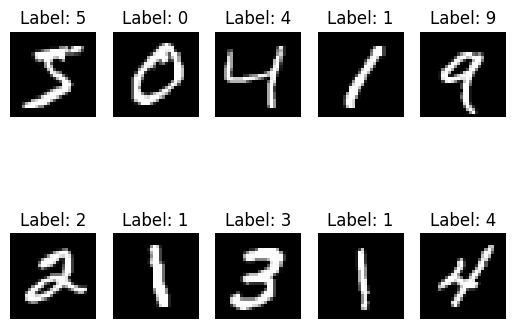

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Display the first 10 digits in the training set
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    index_of_one = np.argmax(y_train[i])
    plt.title(f"Label: {index_of_one}")
    plt.axis('off')
plt.show()

Now, let's create the sequental model of the keras for adding the layers of the CNN one by one.

The Sequential model should have the following architecture:
-> Input with shape  [28×28×1]

-> Conv2D (32 filters; kernel size is  [3×3]
 ; activation function is relu )


-> MaxPooling2D layer with pool size  [2×2]

-> Conv2D (64 filters; kernel size is  [3×3]
 ; activation function is relu )

-> MaxPooling2D layer with pool size  [2×2]

-> Flatten

-> Dropout layer with the 50% rate

-> Dense layer with the softmax activation function (you should also specify the number of output classes)

### Task 3

In [11]:
# implement the CNN model with the architecture given above - see the example at https://www.tensorflow.org/tutorials/images/cnn
# Your code below


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

### What is the "Flatten" layer?

- In a CNN, the convolutional layers perform feature extraction by applying filters to the input image. The output of these layers is a 3D tensor that contains the spatial information of the image, as well as the extracted features. However, in order to feed this output to a fully connected layer, we need to convert it into a 1D tensor, which can be achieved using the flatten layer.

- The flatten layer takes the 3D tensor output of the last convolutional layer and converts it into a 1D tensor by reshaping it. This process does not modify the data, but rather rearranges it into a linear sequence. This linear sequence can then be fed to the fully connected layers, which can then learn to classify the image.

Let's start the training process.  Before that, we should config the model with losses and metrics with model.compile().

In [12]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



Epoch 1/5
422/422 [==============================] - 48s 111ms/step - loss: 0.3612 - accuracy: 0.8904 - val_loss: 0.0852 - val_accuracy: 0.9753
Epoch 2/5
422/422 [==============================] - 43s 102ms/step - loss: 0.1160 - accuracy: 0.9646 - val_loss: 0.0611 - val_accuracy: 0.9833
Epoch 3/5
422/422 [==============================] - 44s 105ms/step - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.0508 - val_accuracy: 0.9865
Epoch 4/5
422/422 [==============================] - 43s 102ms/step - loss: 0.0723 - accuracy: 0.9774 - val_loss: 0.0457 - val_accuracy: 0.9868
Epoch 5/5
422/422 [==============================] - 41s 98ms/step - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.0450 - val_accuracy: 0.9880


Let's plot the diagram which shows the progress in loss of the model during the train:

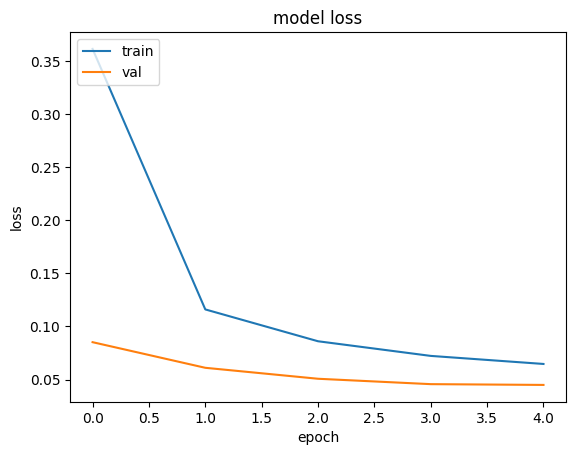

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We can also plot the diagram which shows the progress of the model with regard to its accuracy.

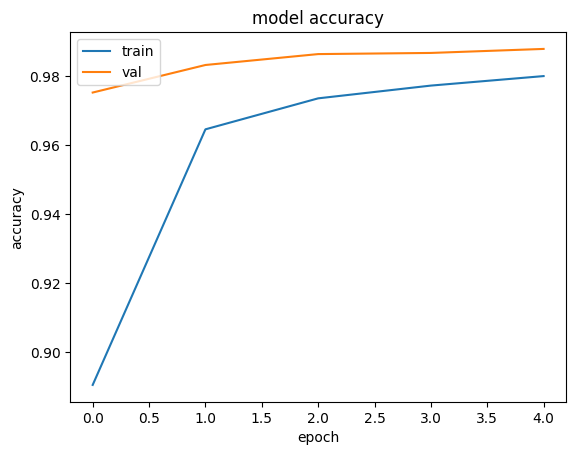

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Finally, let's evaluate our CNN on the test set

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04201619699597359
Test accuracy: 0.9854000210762024


## Task 4

The CNN we built has a **Dropout** layer.

1. Read the original dropout paper by Geoffrey Hinton et al., "Dropout: A Simple Way to Prevent Neural Networks from Overfitting" (2014), to understand the importance of DropOut.

2. Create a new CNN identical to your previous model but without any Dropout layers, train and evaluate it using the same data splits, preprocessing, hyperparameters, and procedure as before, then report the training, validation, and test accuracy and loss for this no-dropout model, and do a side-by-side comparison with the original (with-dropout) model—including final metrics. Did the performance improved or got worse? Think why that could be the case. 